# Análise de Preços das matérias-primas agrícolas **(1990-2020)**

>Este conjunto de dados compreende preços e variação percentual de preços para lã grossa, copra, algodão, lã fina, toras de madeira dura, madeira serrada dura, couro, compensado, borracha, toras de madeira macia, madeira serrada macia e celulose.

*Fonte: Base de dados do [Kaggle](https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020)*

In [ ]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd

### Carregando o conjunto de dados em um quadro de dados usando o Pandas

In [ ]:
# lendo o arquivo CSV com os dados das matérias-primas agrícolas
df = pd.read_csv('agricultural_raw_material.csv')

### Explorando o conjunto de dados

In [ ]:
# informações gerais sobre o dataset
df.info

<bound method DataFrame.info of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                      

In [53]:
# Checagem de valores nulos e vazios
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

### Tratando dados ausentes, incorretos e inválidos

In [ ]:
# Tratamento de dados faltantes e limpeza dos dados
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)
df = df.dropna()
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [ ]:
# Criando uma lista com os nomes das colunas e convertendo os valores para float
list = [
    'Coarse wool Price',
    'Coarse wool price % Change',
    'Copra Price',
    'Copra price % Change',
    'Cotton Price',
    'Cotton price % Change',
    'Fine wool Price',
    'Fine wool price % Change',
    'Hard log Price',
    'Hard log price % Change',
    'Hard sawnwood Price',
    'Hard sawnwood price % Change',
    'Hide Price',
    'Hide price % change',
    'Plywood Price',
    'Plywood price % Change',
    'Rubber Price',
    'Rubber price % Change',
    'Softlog Price',
    'Softlog price % Change',
    'Soft sawnwood Price',
    'Soft sawnwood price % Change',
    'Wood pulp Price',
    'Wood pulp price % Change'
]
# Converting the columns to float type
df[list] = df[list].astype('float')
df.dtypes

Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64
dtype: object

In [ ]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


### Colunas de data e horacolunas

>Formatando a coluna datetime e definindo-a como índice para o conjunto de dados  

In [ ]:
# Convertendo a coluna 'Month' para o formato datetime e definindo-a como índice do DataFrame
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Month')

In [61]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


### Análise Exploratória e Visualização.

>Vamos começar importando **matplotlib.pyplot e o seaborn

In [ ]:
# Configurações de visualização
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5) 
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Mapa de calor

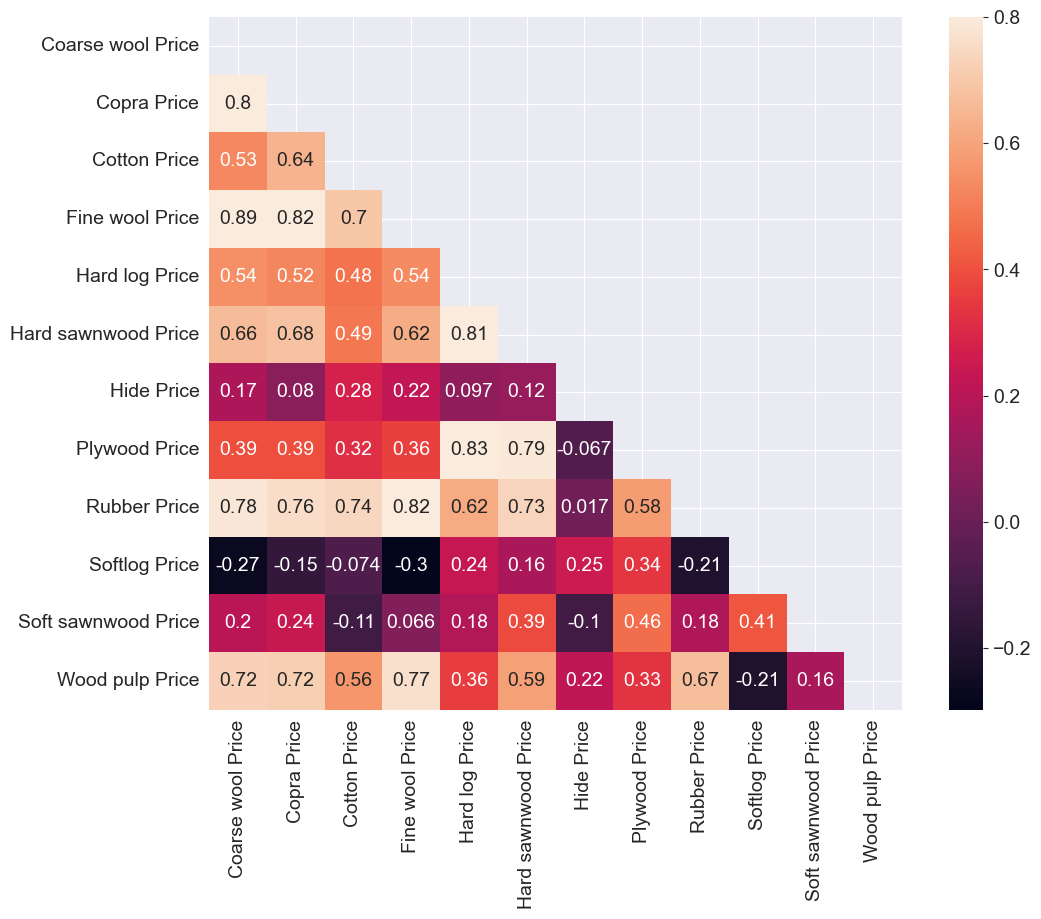

In [ ]:
# Análise de correlação entre as variáveis de preço bruto
raw_data=['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
corrmat = df[raw_data].corr()
fig = plt.figure(figsize = (12, 9))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

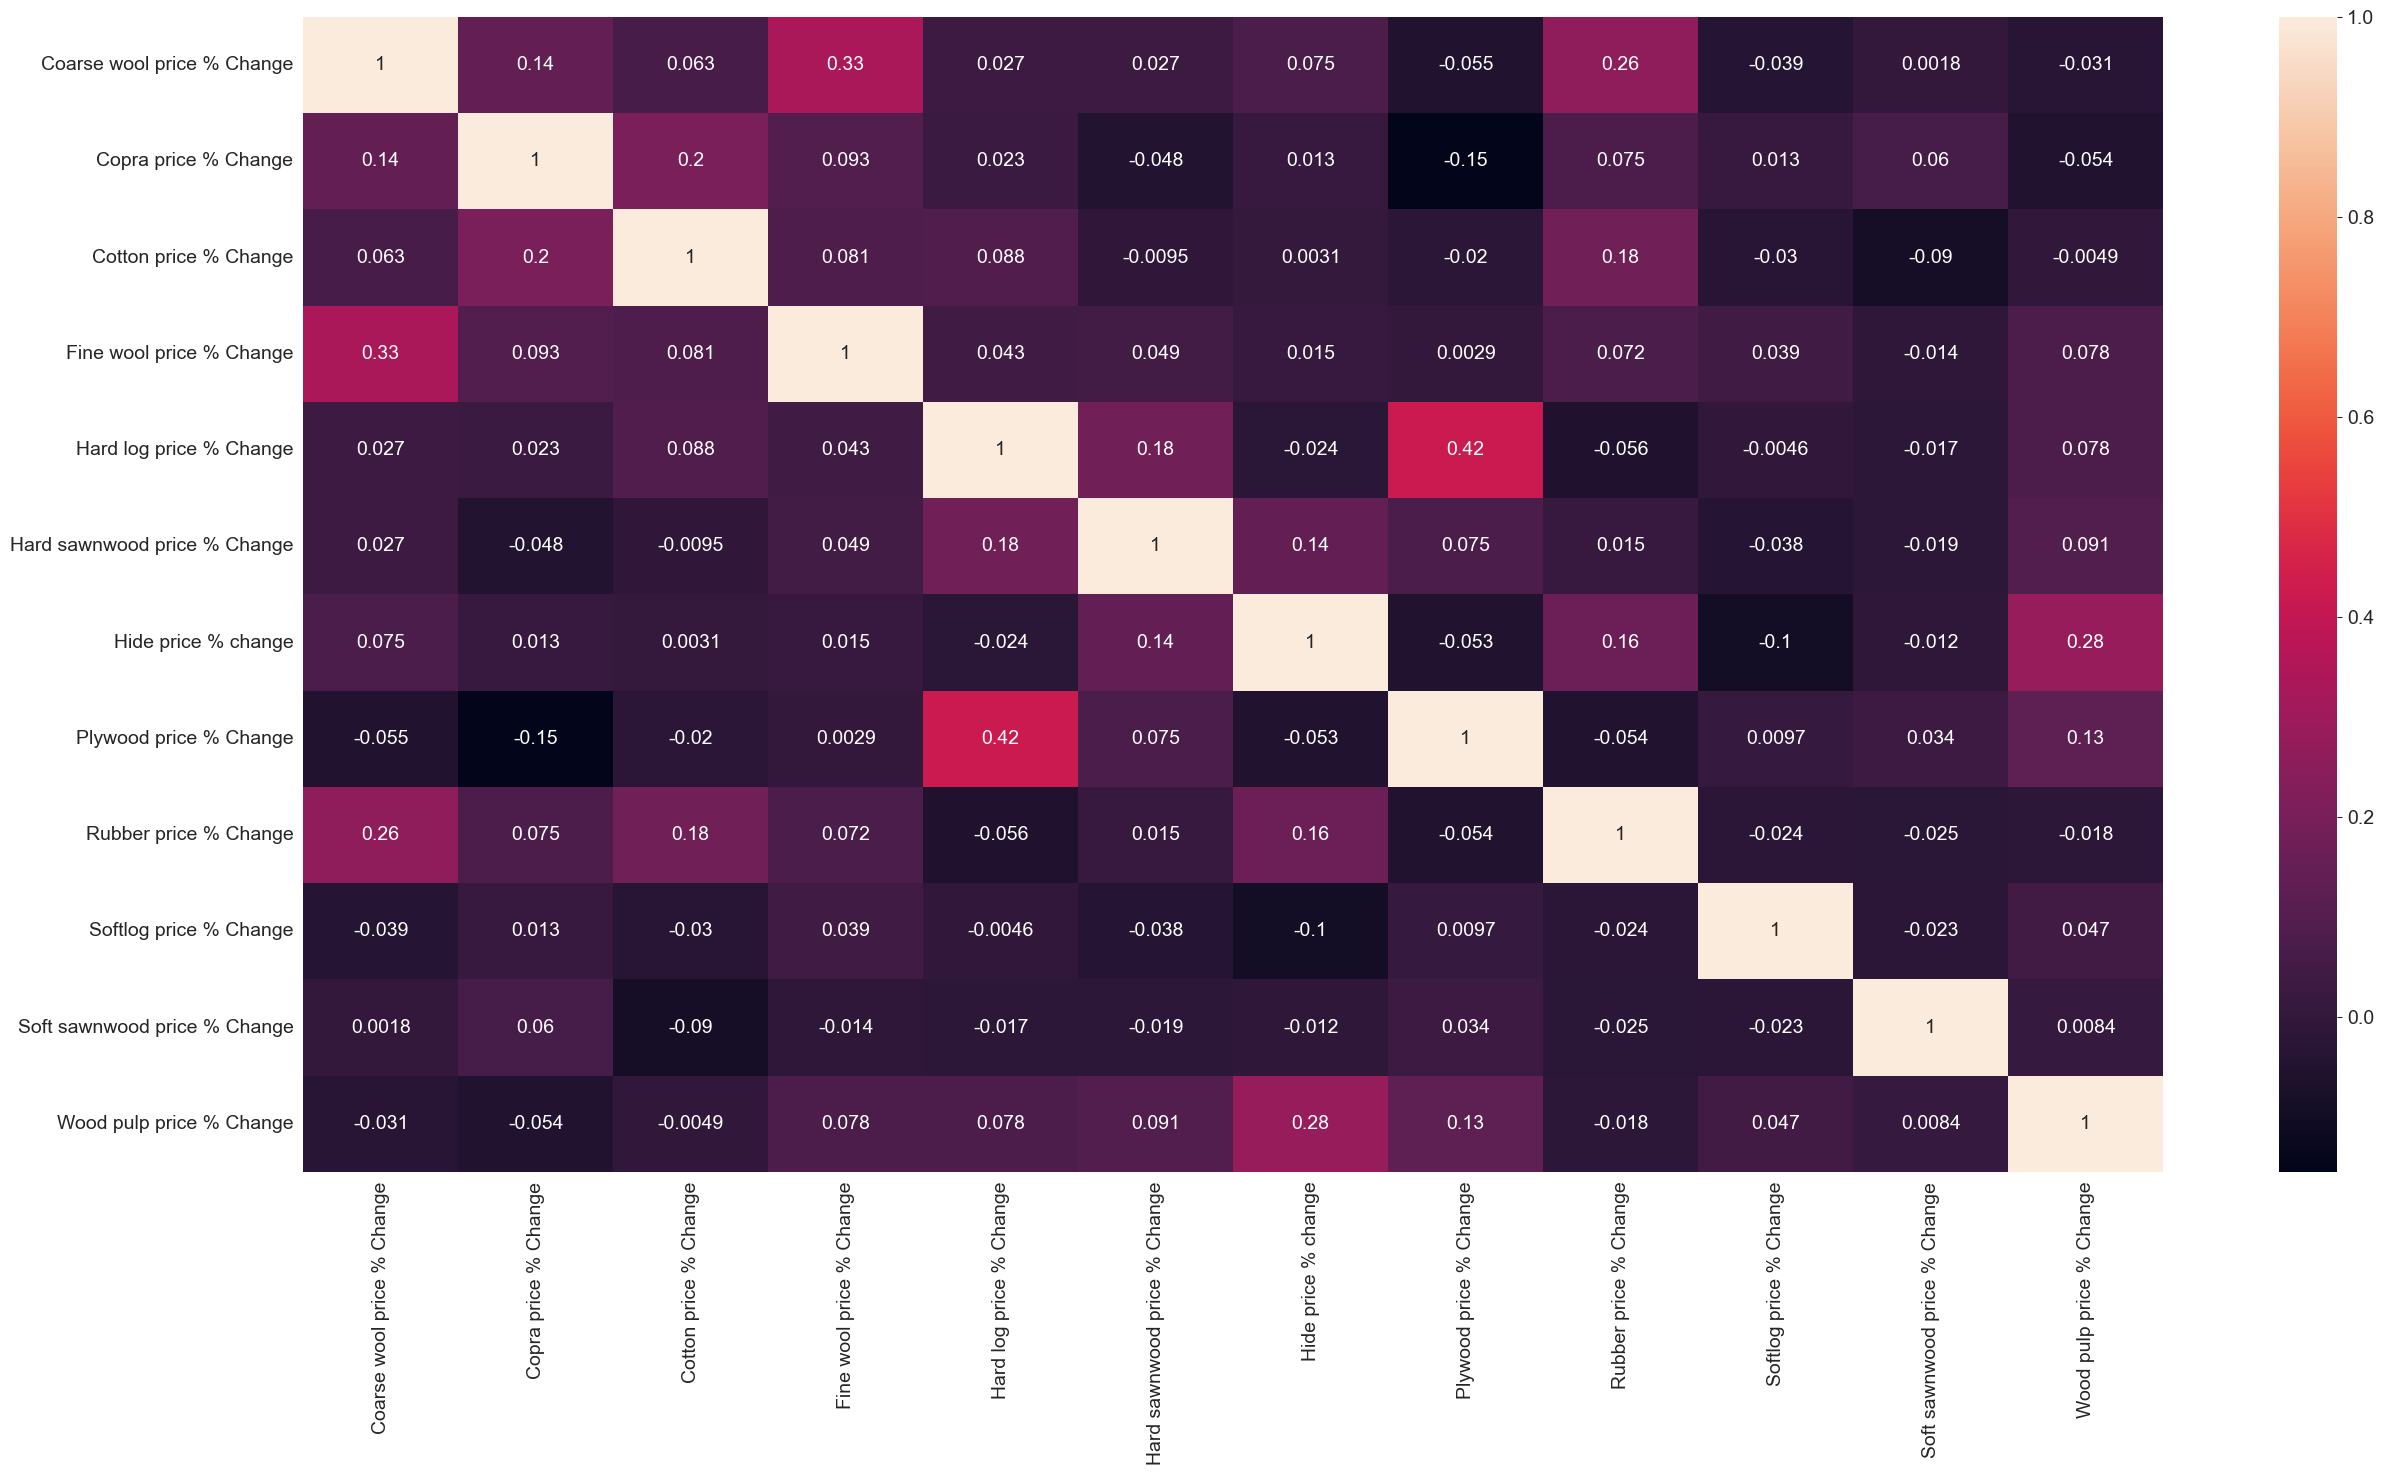

In [ ]:
# Análise de correlação entre as variáveis de variação percentual dos preços
plt.figure(figsize=(30,15))
changelist=['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


>Apartir desse gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas.

* Um valor negativo de correlação indica que as duas variáveis tendem a se mover em direções opostas, ou seja, quando uma aumenta, a outra tende a diminuir.

* Um valor próximo de zero indica pouca ou nenhuma relação linear entre as variáveis.

* Valores positivos mais elevados indicam uma relação linear mais forte, sugerindo que os preços e suas variações percentuais tendem a se mover na mesma direção.

### Lã grossa

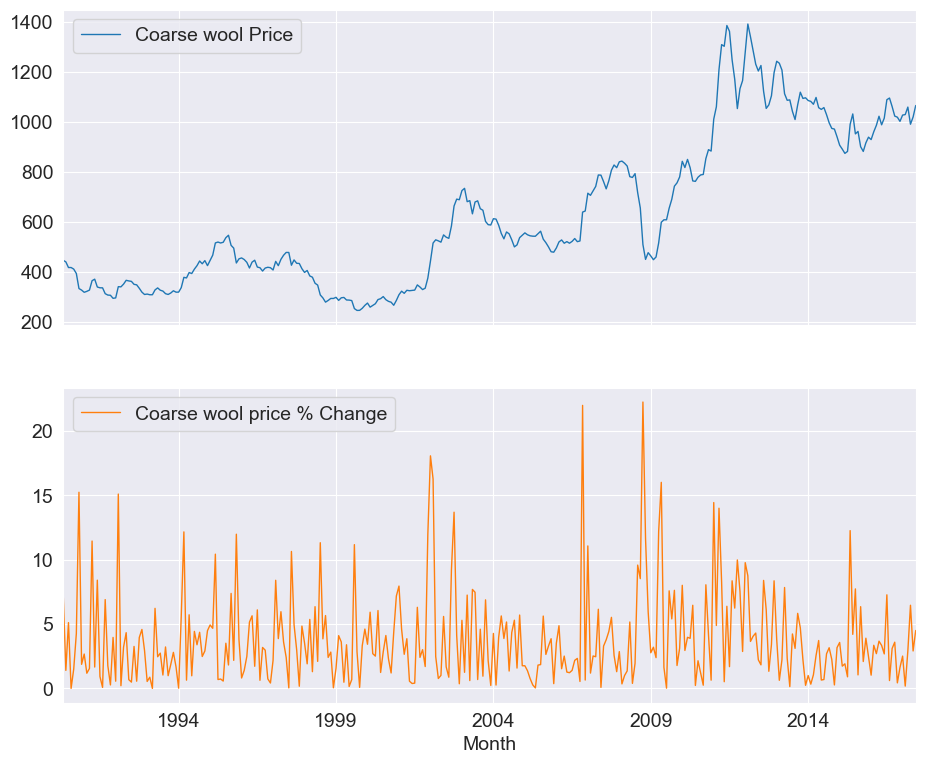

In [ ]:
# Visualização dos dados de preço bruto e variação percentual do preço da Lã Grossa
axes=df[['Coarse wool Price', 'Coarse wool price % Change']].plot(figsize=(11,9), subplots=True, linewidth=1)
plt.show()

>Visualização de todos os outros recursos fornecidos no conjunto de dados

## 1 - Variação normal do preço de cada matéria-prima

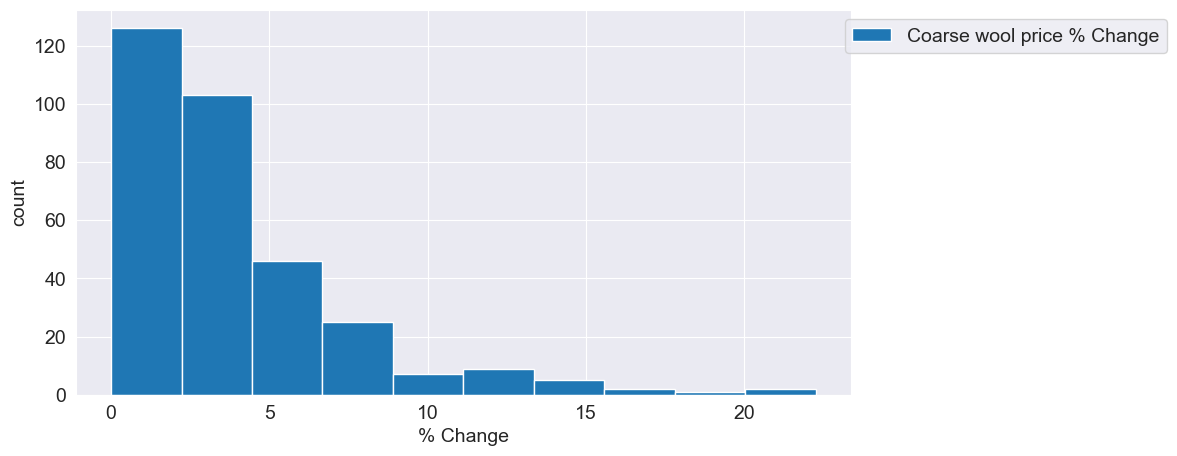

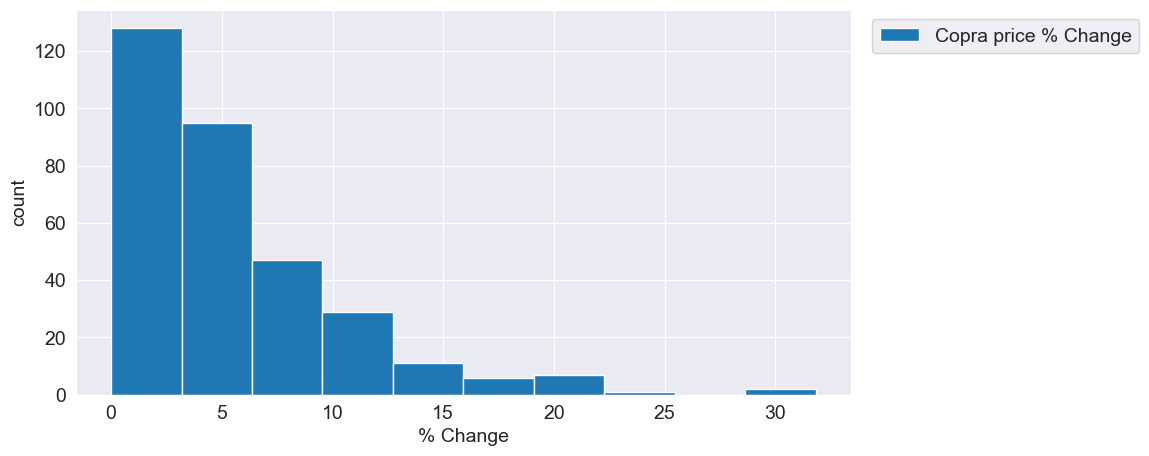

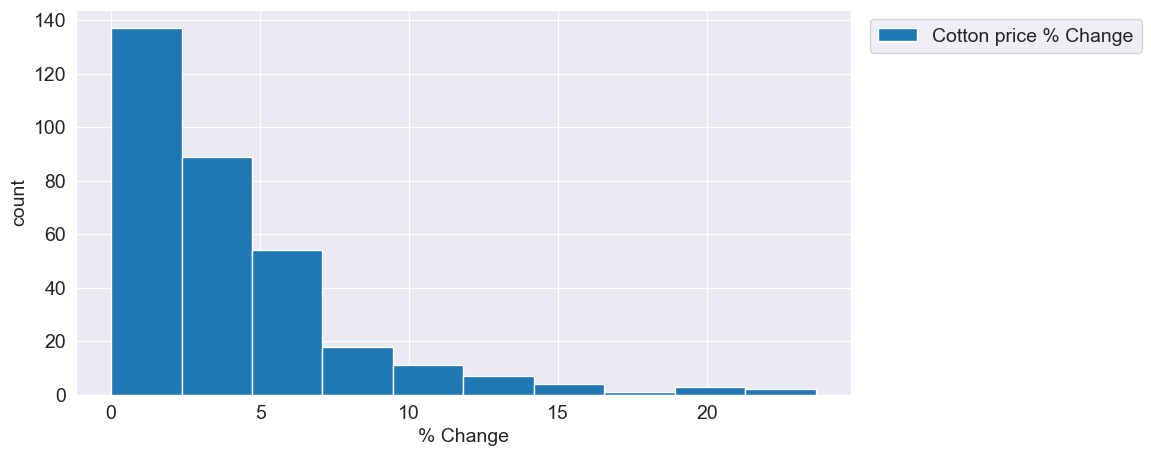

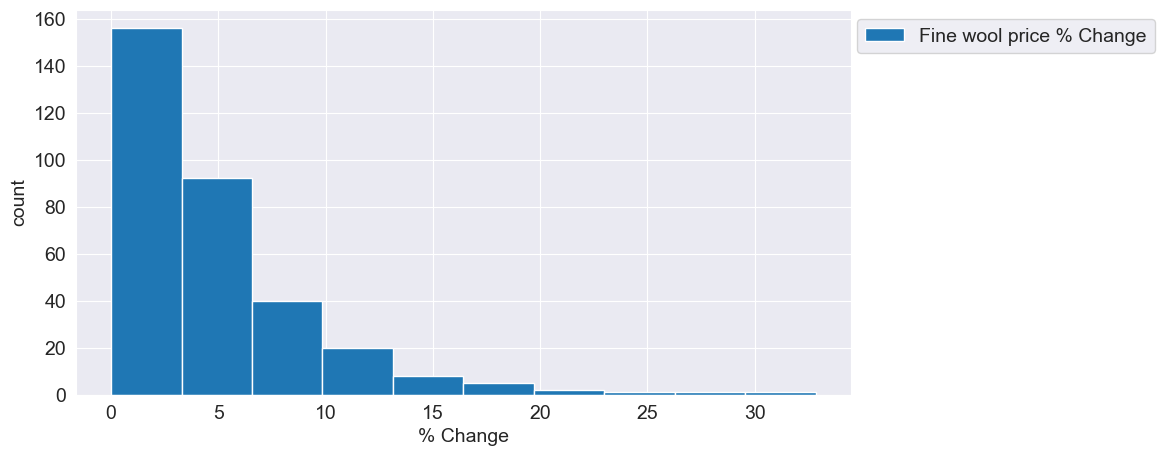

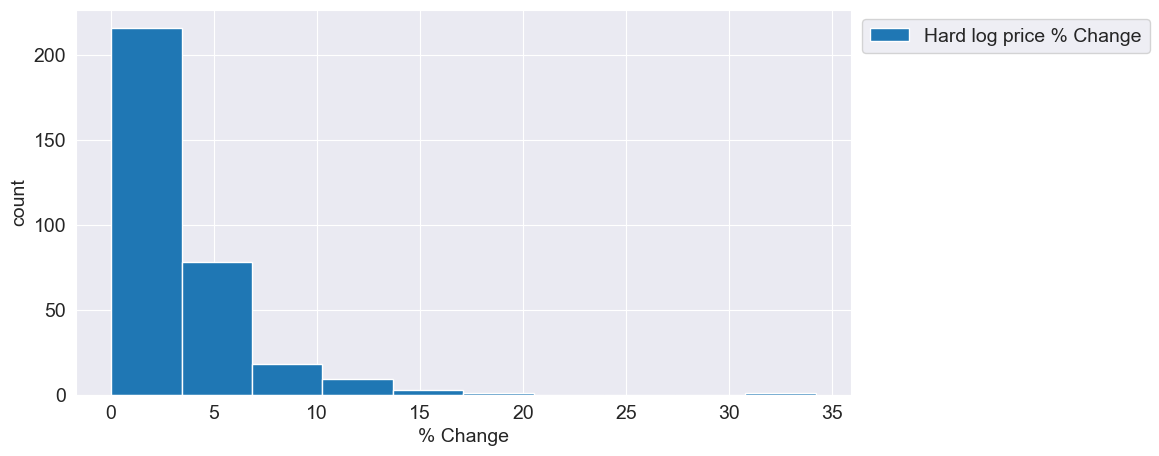

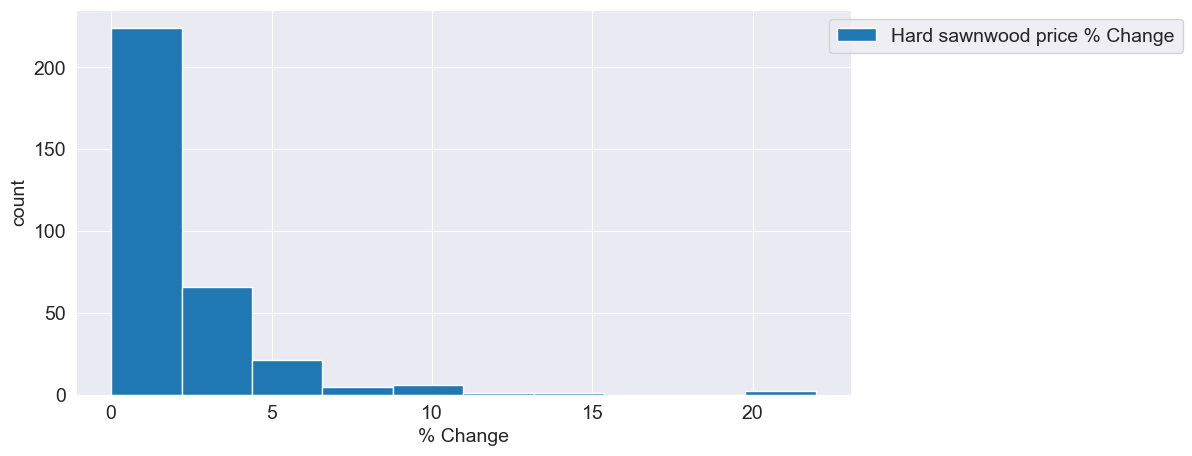

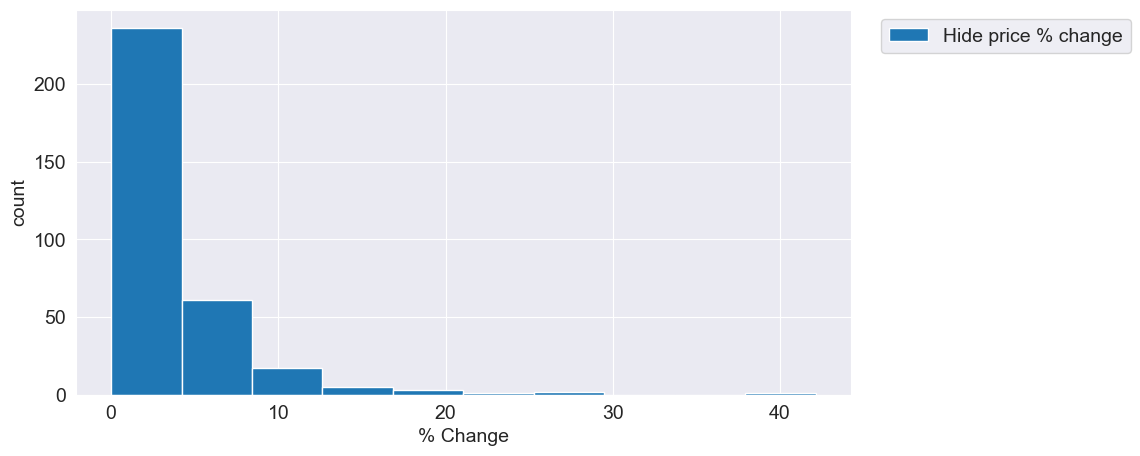

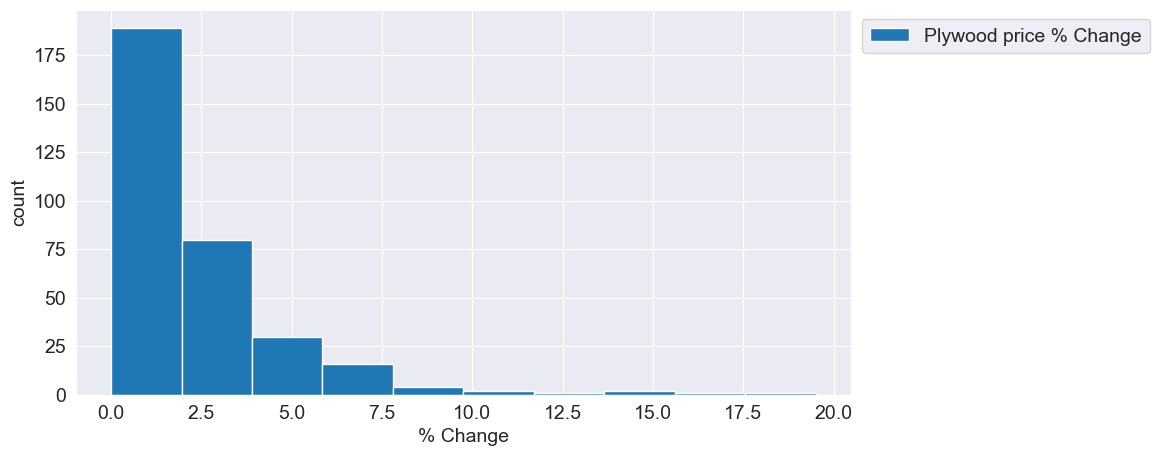

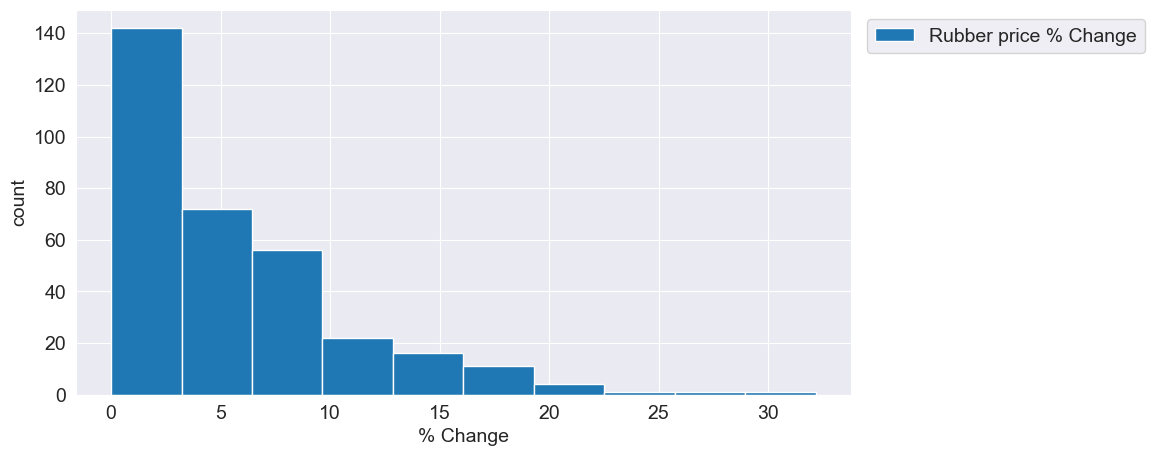

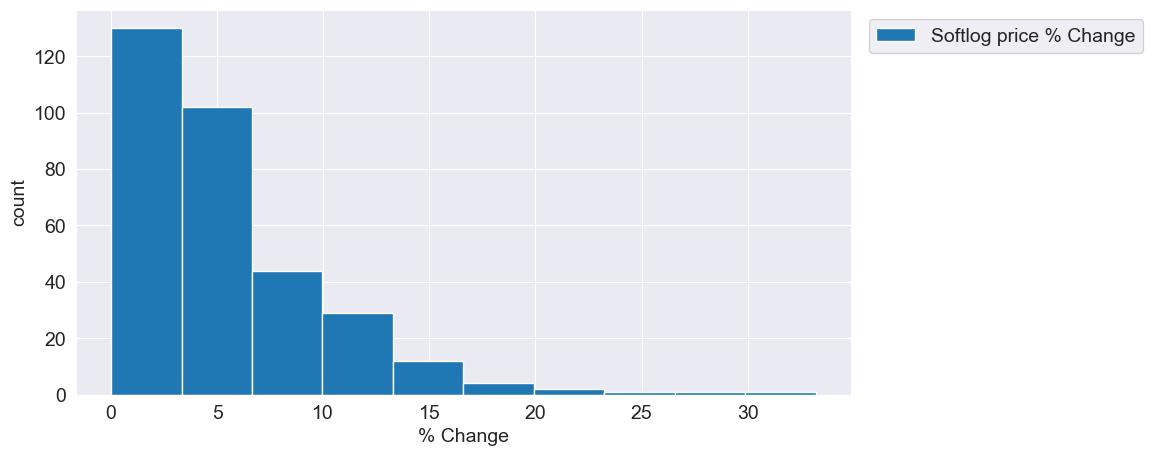

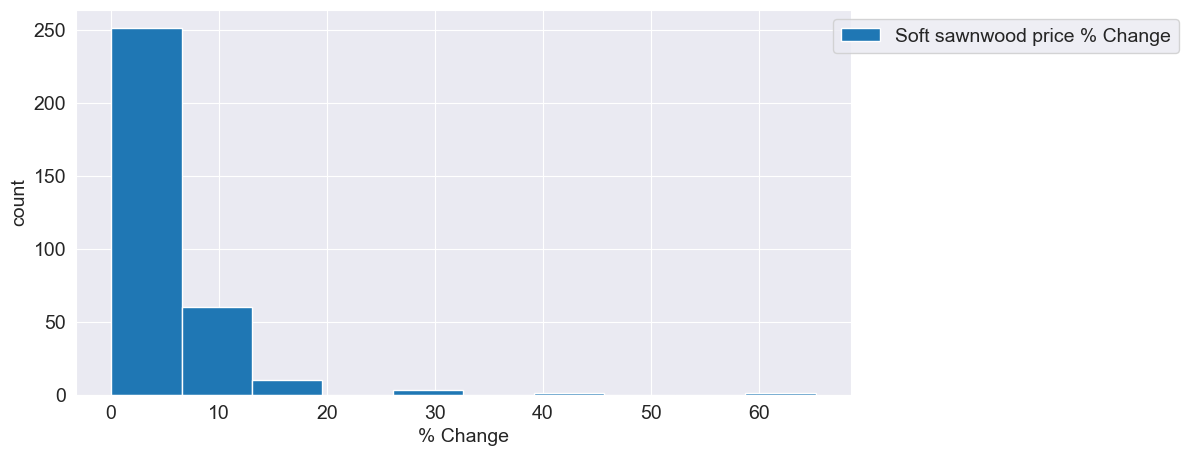

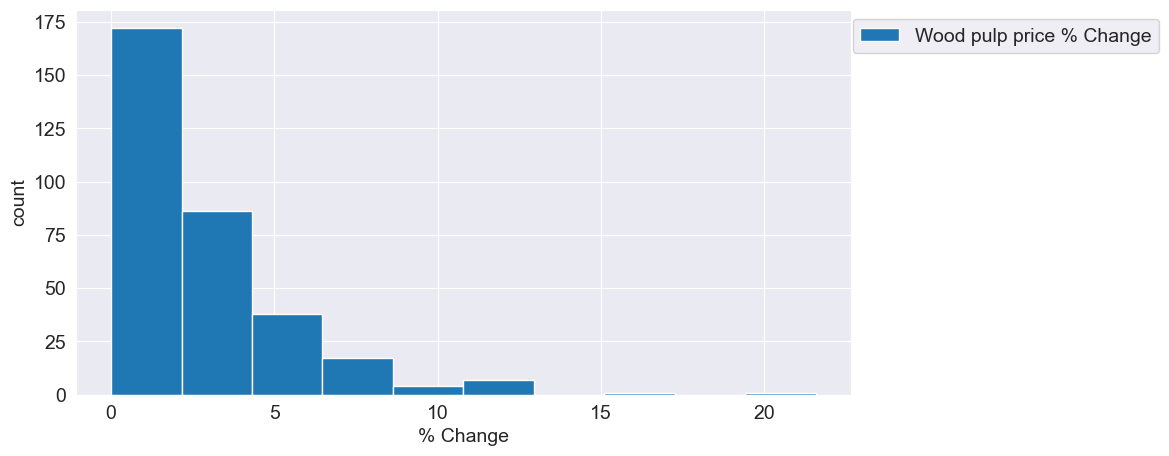

In [ ]:
# Histograma das variações percentuais dos preços das matérias-primas
changelist=['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']
for i in range(len(changelist)):
    plt.figure(figsize=(10, 3))
    df[changelist[i]].hist(figsize=(10, 5), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('count')
    plt.legend(changelist[i:],loc='upper center', bbox_to_anchor=(1.2,1))
    plt.show()

>Podemos observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

## 2- Matéria-prima com o menor preço ao longo dos anos

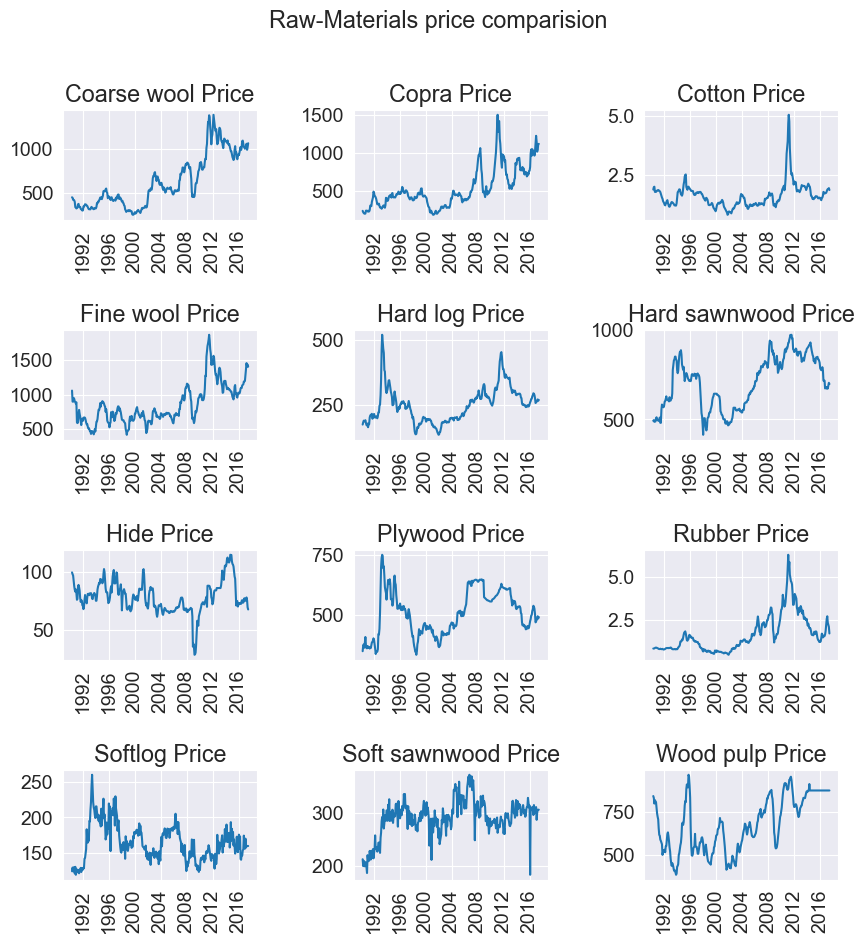

In [95]:
# Visualização comparativa dos preços das matérias-primas ao longo do tempo
plt.figure(figsize=(10, 10))
materialslist=['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
for i in range(len(materialslist)):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5) 
    plt.title(materialslist[i])
    plt.plot(df[materialslist[i]])
    plt.xticks(rotation=90)
    plt.suptitle('Raw-Materials price comparision')
plt.show()

>Podemos ver que o algodão e a borracha são de preços mais baixos, vamos comparar os preços para entender melhor qual é o mais baixo

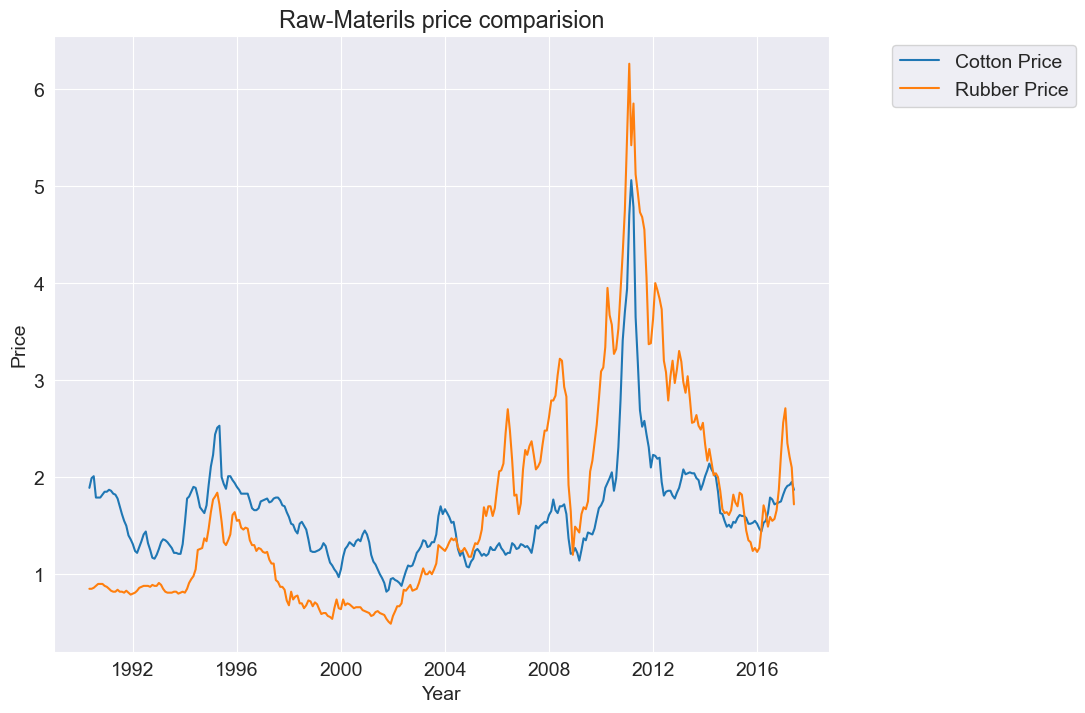

In [ ]:
# Comparação dos preços do Algodão e da Borracha ao longo do tempo
plt.figure(figsize=(10, 8))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title('Raw-Materils price comparision')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2,1))
plt.show()

>O algodão é a matéria-prima de menor preço nos últimos anos (*tanto o algodão quanto a borracha são materiais de baixo preço*)

## 3 - Matéria-prima com maior e menor variação de % de preço

In [ ]:
import random as random

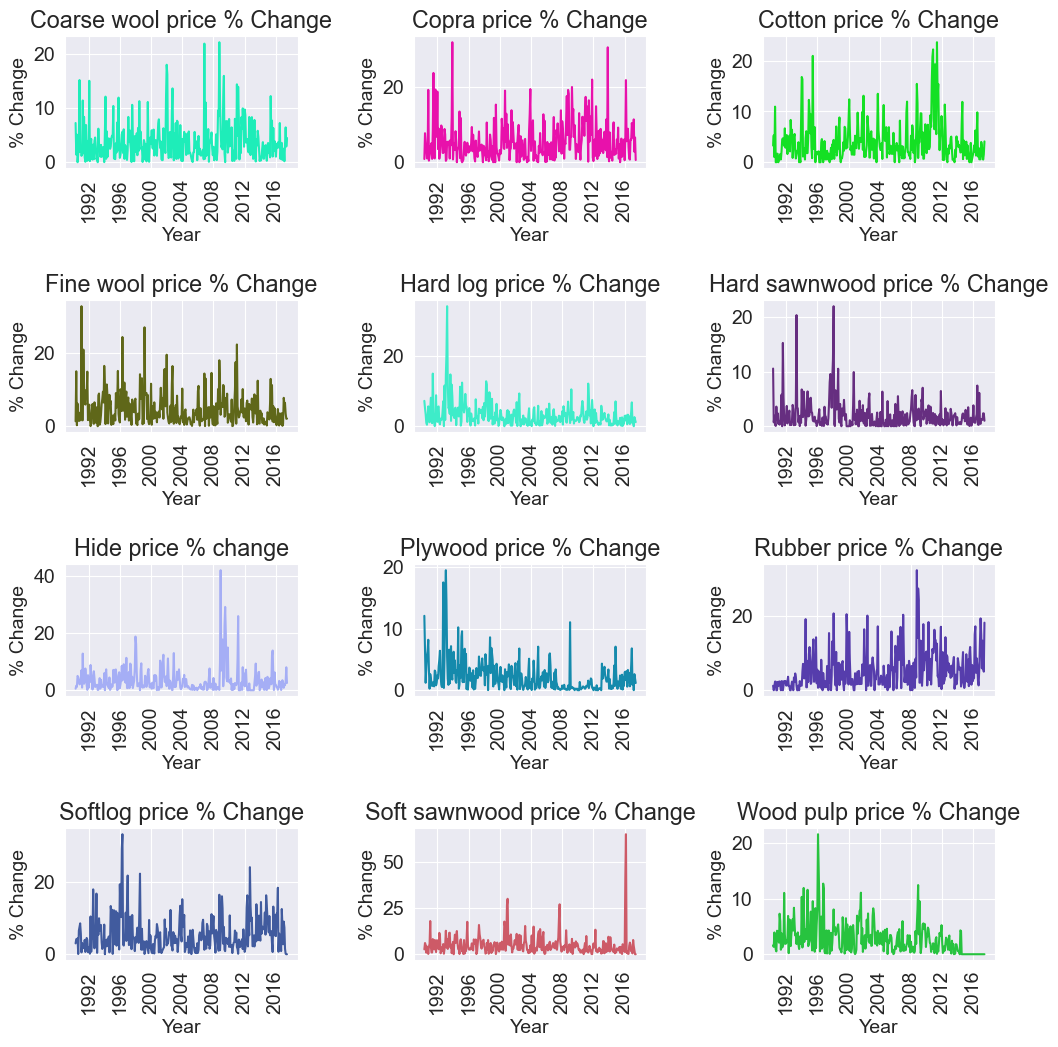

In [ ]:
# Visualização das variações percentuais dos preços das matérias-primas ao longo do tempo
plt.figure(figsize=(12, 12))
for i in range(len(changelist)):

  r = random.random()
  b = random.random()
  g = random.random()
  color = (r, g, b)
  plt.subplot(4, 3, i+1)
  plt.subplots_adjust(hspace=1, wspace=0.5)
  plt.plot(df[changelist[i]], color=color)
  plt.xticks(rotation=90)
  plt.title(changelist[i])
  plt.xlabel('Year')
  plt.ylabel('% Change')
plt.show()

>*Podemos ver que o maior % de mudança em mais de 60% para madeira serrada macia e o menor % de mudança é para madeira compensada em menos de 20%*

## 4 - Matérias-primas com mudanças drásticas de preço

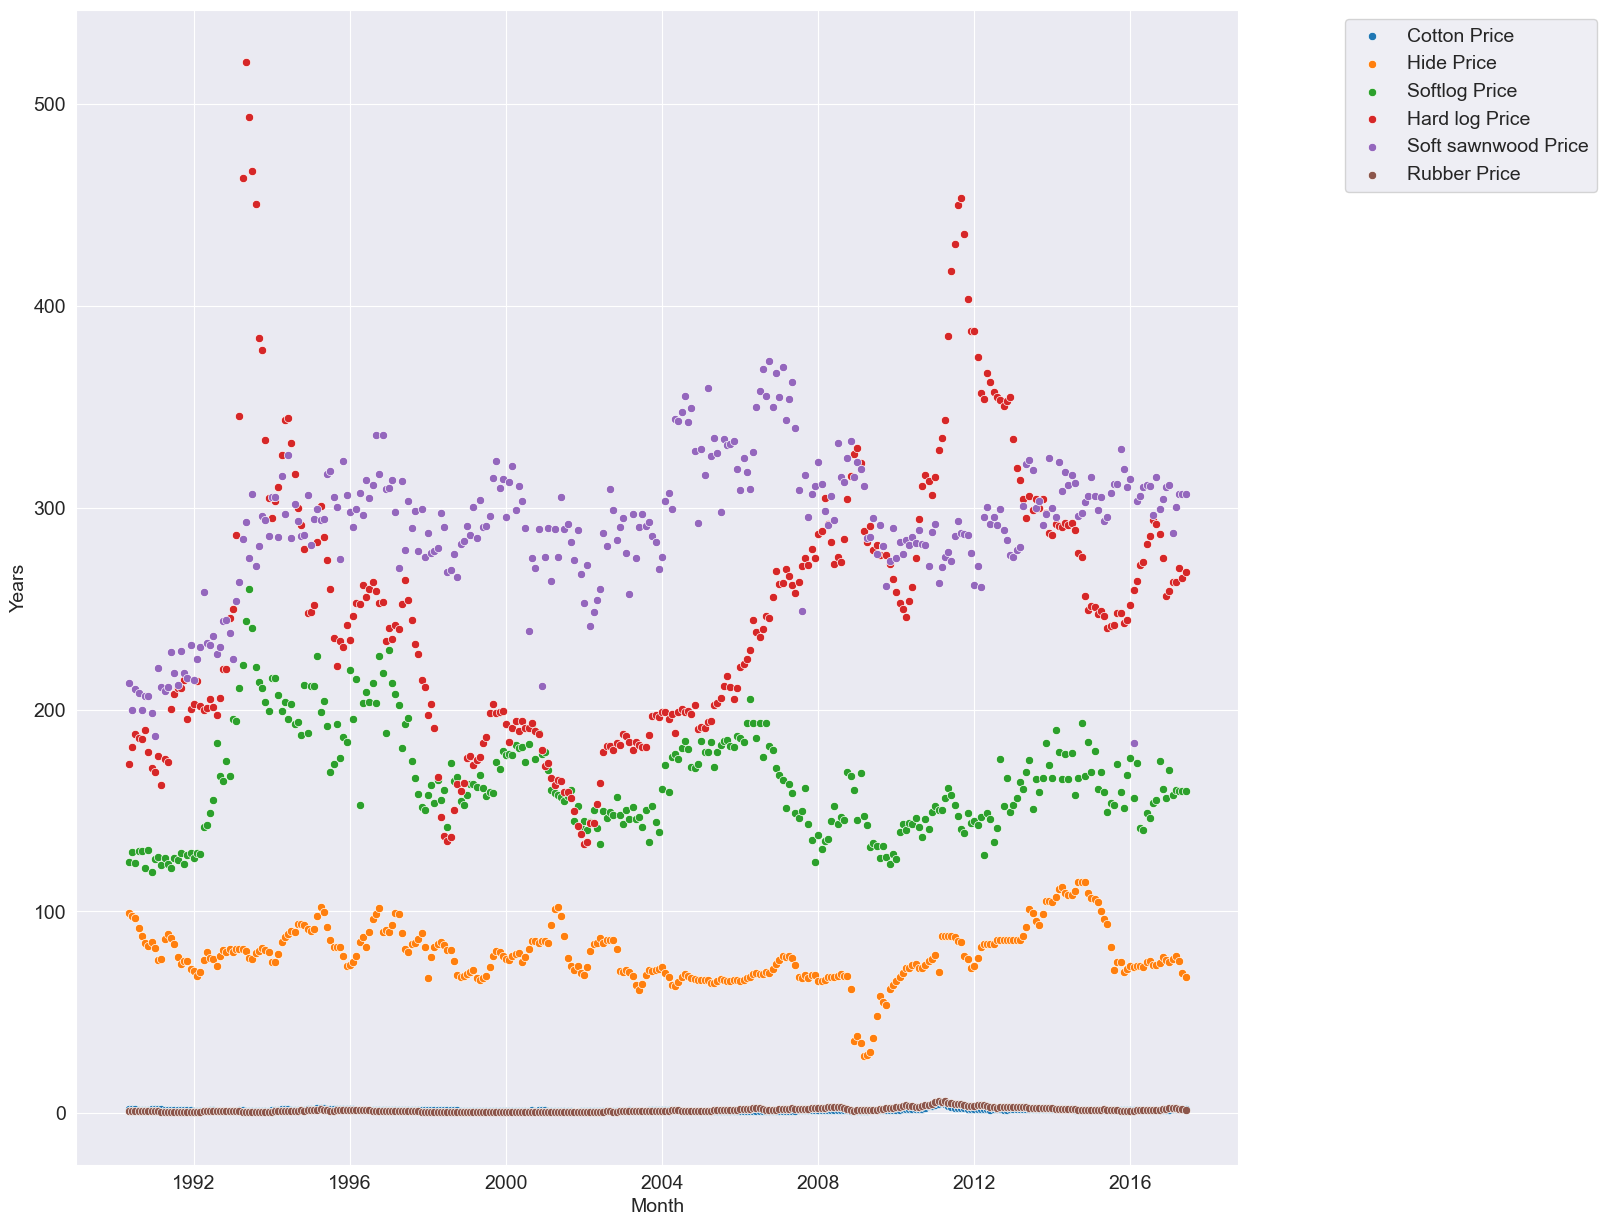

In [ ]:
# Visualização de mudanças nos preços de algumas matérias-primas ao longo do tempo
lowlist=['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
plt.figure(figsize=(15, 15))
plt.ylabel('Prices')
plt.ylabel('Years')
for i in range(len(lowlist)):
    sns.scatterplot(y=df[lowlist[i]], x=df.index)
    plt.legend(lowlist,loc='upper center', bbox_to_anchor=(1.2,1))
plt.show()

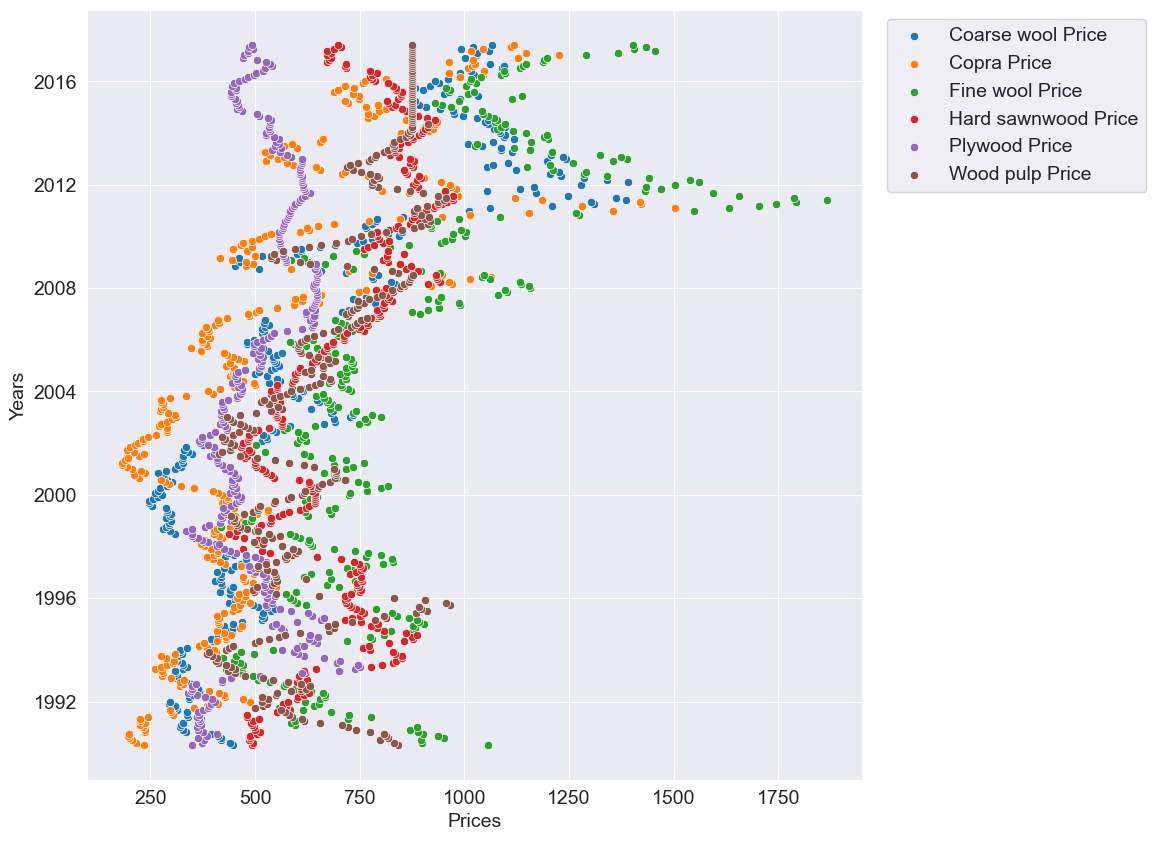

In [ ]:
# Visualização de mudanças nos preços de outras matérias-primas ao longo do tempo
highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
plt.figure(figsize=(10, 10))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))
plt.show()

>*A mudança de preço é drástica para o preço de **Tora dura** entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de **Lã fina***

## 5 - Descobrir a faixa de preço de matérias-primas de baixo preço

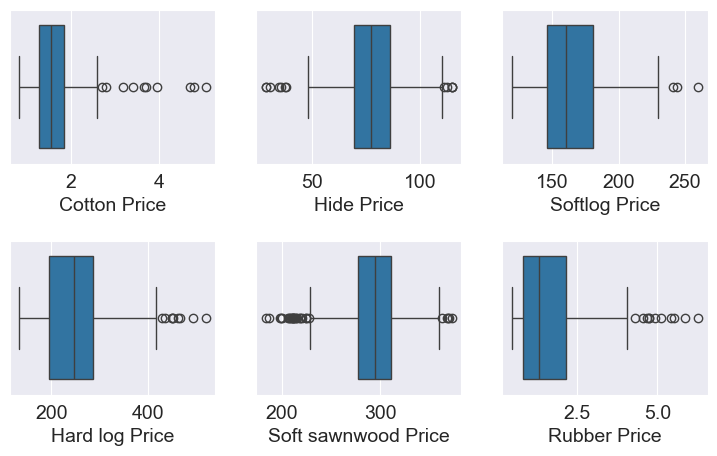

In [ ]:
# Boxplot dos preços de algumas matérias-primas agrícolas
lowlist=['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[lowlist[i]])
plt.show()

>*Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers*


**Inferências e Conclusão**
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* alta e baixa % de variação dos materiais.
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor.

*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*  Também pudemos prever os preços das matérias-primas analisando os anos anteriores

* Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.